In [5]:
# Import necessary libraries
import os
import MDAnalysis as mda
import nglview as nv
from IPython.display import display
import glob
import numpy as np
from MDAnalysis.lib.distances import distance_array

def load_trajectory(gro, xtc):
    """
    Load the trajectory using MDAnalysis.
    """
    return mda.Universe(gro, xtc)

def select_atoms(universe):
    """
    Select atoms excluding solvent and ions.
    Modify the selection string based on your system.
    """
    # Exclude water (SOL) and ions (NA, CL)
    selection = universe.select_atoms('not resname SOL') #'not resname SOL NA CL'
    return selection

def resolve_path(pattern):
    """
    Resolve a file path pattern with wildcards to the actual file path.
    
    Parameters:
        pattern (str): The file path pattern containing wildcards.
        
    Returns:
        str: The resolved file path.
        
    Raises:
        FileNotFoundError: If no files match the pattern.
        ValueError: If multiple files match the pattern.
    """
    matched_files = glob.glob(pattern)
    if not matched_files:
        raise FileNotFoundError(f"No files match the pattern: {pattern}")
    elif len(matched_files) > 1:
        raise ValueError(f"Multiple files match the pattern: {pattern}\nMatched files: {matched_files}")
    return matched_files[0]

def visualize_simulation(sim_id):
    """
    Visualize the selected simulation using nglview.
    """
    # Retrieve file paths from the dictionary
    paths = simulation_paths.get(sim_id)
    if not paths:
        print(f"Simulation ID '{sim_id}' not found.")
        return
    
    gro_file = resolve_path(paths['gro_file'])
    xtc_file = paths['xtc_file']
    
    # Load the trajectory
    universe = load_trajectory(gro_file, xtc_file)
    
    # Select atoms (excluding solvent and ions)
    selection = select_atoms(universe)
    
    print(f"Number of atoms selected: {len(selection)}")
    
    # Create an nglview widget with the Universe object
    view = nv.show_mdanalysis(selection)
    
    # 3. Ball+Stick representation for specific elements (excluding solvent and ions)
    view.add_representation('ball+stick', selection='not resname SOL NA CL')
    
    # Center the view on the molecule
    view.center()
    
    # Display the widget
    display(view)

In [4]:
process_dir_1a5e = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IT6-param-1a5e/process/"
process_dir_5a1e = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IT6-param-5a1e/process/"

simulation_paths = {
    "IT6_1a5e": {
        "gro_file": f"{process_dir_1a5e}/IT6_1a5e/run_gmx_simulation/md.gro",
        "xtc_file": f"{process_dir_1a5e}/IT6_1a5e/run_gmx_simulation/md_center.xtc",
    },
    "IT6_5a1e": {
        "gro_file": f"{process_dir_5a1e}/IT6_5a1e/run_gmx_simulation/md.gro",
        "xtc_file": f"{process_dir_5a1e}/IT6_5a1e/run_gmx_simulation/md_center.xtc",
    },
}

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Create a dropdown widget for simulation selection
simulation_selector = widgets.Dropdown(
    options=list(simulation_paths.keys()),
    value=list(simulation_paths.keys())[0],  # Default value
    description='Simulation:',
    disabled=False,
)


# Use interact to link the dropdown to the visualization function
interact(visualize_simulation, sim_id=simulation_selector);

interactive(children=(Dropdown(description='Simulation:', options=('IT6_1a5e', 'IT6_5a1e'), value='IT6_1a5e'),…

In [3]:
process_dir = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IT6-param-1a5e/process/"

simulation_paths = {
    "IT6_5a1e": {
        "gro_file": f"{process_dir}/IT6_1a5e/run_gmx_simulation/md.gro",
        "xtc_file": f"{process_dir}/IT6_1a5e/run_gmx_simulation/md_center.xtc",
    },
}

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Create a dropdown widget for simulation selection
simulation_selector = widgets.Dropdown(
    options=list(simulation_paths.keys()),
    value=list(simulation_paths.keys())[0],  # Default value
    description='Simulation:',
    disabled=False,
)


# Use interact to link the dropdown to the visualization function
interact(visualize_simulation, sim_id=simulation_selector);

interactive(children=(Dropdown(description='Simulation:', options=('IT6_5a1e',), value='IT6_5a1e'), Output()),…

In [ ]:
process_dir = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/ip6-mieser/process"

simulation_paths = {
    "IP_101101_50": {
        "gro_file": f"{process_dir}/IP_101101_50/run_gmx_simulation/md.gro",
        "xtc_file": f"{process_dir}/IP_101101_50/run_gmx_simulation/md_center.xtc",
    },
        "IP_101101_100": {
        "gro_file": f"{process_dir}/IP_101101_100/run_gmx_simulation/md.gro",
        "xtc_file": f"{process_dir}/IP_101101_100/run_gmx_simulation/md_center.xtc",
    },
}

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Create a dropdown widget for simulation selection
simulation_selector = widgets.Dropdown(
    options=list(simulation_paths.keys()),
    value=list(simulation_paths.keys())[0],  # Default value
    description='Simulation:',
    disabled=False,
)


# Use interact to link the dropdown to the visualization function
interact(visualize_simulation, sim_id=simulation_selector);

In [ ]:
simulation_paths = {
    "IP_101101": {
        "gro_file": f"/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IP6-metaD/mw_pbmetad_310K/w0/prod_pbmetad_310K.gro",
        "xtc_file": f"/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IP6-metaD/mw_pbmetad_310K/w0/prod_pbmetad_310K.xtc",
    },
}

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

# Create a dropdown widget for simulation selection
simulation_selector = widgets.Dropdown(
    options=list(simulation_paths.keys()),
    value=list(simulation_paths.keys())[0],  # Default value
    description='Simulation:',
    disabled=False,
)


# Use interact to link the dropdown to the visualization function
interact(visualize_simulation, sim_id=simulation_selector);

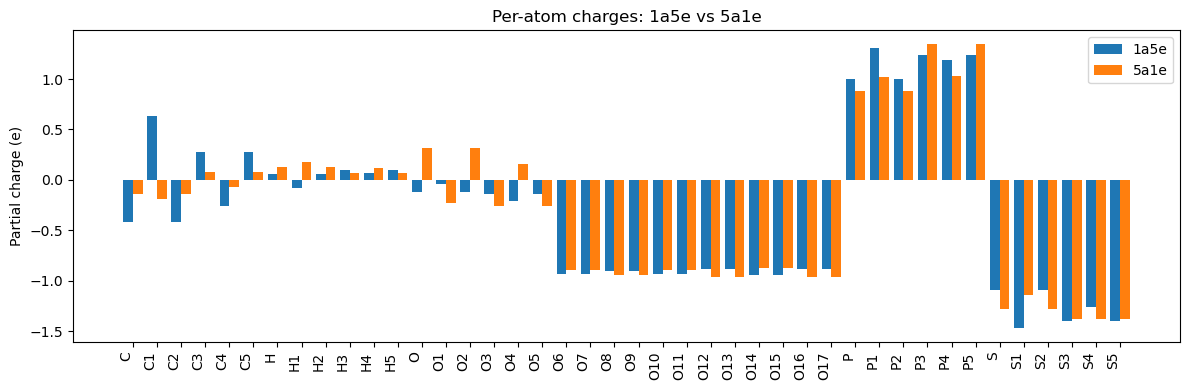

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re 

mol2_1a5e = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IT6-param-1a5e/process/IT6_1a5e/results/averaged_IT6_1a5e.mol2"
mol2_5a1e = "/home/johannal96/Publications.nobackup/2025/electrofit-ip6-paper-2025/projects/IT6-param-5a1e/process/IT6_5a1e/results/averaged_IT6_1a5e.mol2"

def read_mol2_charges(path):
    atoms = []
    in_atoms = False
    with open(path) as f:
        for line in f:
            line = line.strip()
            if line.startswith("@<TRIPOS>ATOM"):
                in_atoms = True
                continue
            if line.startswith("@<TRIPOS>BOND"):
                break
            if in_atoms and line:
                parts = line.split()
                # MOL2 ATOM columns: id, name, x, y, z, type, subst_id, subst_name, charge
                name = parts[1]
                charge = float(parts[-1])
                atoms.append((name, charge))
    return pd.DataFrame(atoms, columns=["atom", "charge"])

df1 = read_mol2_charges(mol2_1a5e).rename(columns={"charge": "q_1a5e"})
df2 = read_mol2_charges(mol2_5a1e).rename(columns={"charge": "q_5a1e"})

def natural_key(name):
    m = re.match(r"([A-Za-z]+)(\d*)$", name)
    if not m:
        return (name, 0)
    prefix, num = m.groups()
    return (prefix, int(num) if num else 0)

merged = pd.merge(df1, df2, on="atom", how="outer").sort_values(
    "atom", key=lambda s: s.map(natural_key)
).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 4))
x = range(len(merged))
width = 0.4

ax.bar([i - width/2 for i in x], merged["q_1a5e"], width=width, label="1a5e")
ax.bar([i + width/2 for i in x], merged["q_5a1e"], width=width, label="5a1e")

ax.set_xticks(x)
ax.set_xticklabels(merged["atom"], rotation=90, ha="right")
ax.set_ylabel("Partial charge (e)")
ax.set_title("Per-atom charges: 1a5e vs 5a1e")
ax.legend()
plt.tight_layout()
plt.show()
